In [1]:
import xarray
import pygmt
import pandas
import numpy as np

In [2]:
ds = xarray.open_dataset("../data/MIROC_inputs/ctrl_MIROCinput.nc", decode_timedelta=False)

In [3]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 128 ;
	lon = 256 ;
	level = 40 ;
	hydro = 9 ;

variables:
	float64 landmask(lat, lon) ;
	float64 skt(lat, lon) ;
	float64 orography(lat, lon) ;
	float64 sunlit(lat, lon) ;
	float64 pfull(level, lat, lon) ;
	float64 height(level, lat, lon) ;
	float64 height_half(level, lat, lon) ;
	float64 T_abs(level, lat, lon) ;
	float64 qv(level, lat, lon) ;
	float64 rh(level, lat, lon) ;
	float64 tca(level, lat, lon) ;
	float64 cca(level, lat, lon) ;
	float64 mr_lsliq(level, lat, lon) ;
	float64 mr_lsice(level, lat, lon) ;
	float64 mr_ccliq(level, lat, lon) ;
	float64 mr_ccice(level, lat, lon) ;
	float64 fl_lsrain(level, lat, lon) ;
	float64 fl_lssnow(level, lat, lon) ;
	float64 fl_ccrain(level, lat, lon) ;
	float64 fl_ccsnow(level, lat, lon) ;
	float64 dtau_s(level, lat, lon) ;
	float64 dtau_c(level, lat, lon) ;
	float64 dem_s(level, lat, lon) ;
	float64 dem_c(level, lat, lon) ;
	float64 mr_ozone(level, lat, lon) ;
	float64 phalf(level, lat, lon) ;
	float64 Reff(

---

In [4]:
%%capture
data=ds["tca"]
data.load()

zid=10
hid=1

In [5]:
var = data.isel(level=zid)
#var = data.isel(level=zid,hydro=hid)

#lat = ds["lat"].values
#lon = ds["lon"].values

In [6]:
lon, lat = np.meshgrid(var.lon, var.lat)
ll = np.column_stack([lon.ravel(), lat.ravel(), var.values.ravel()])

grid = pygmt.xyz2grd(
    data=ll,
    region=[ -180, 180, -90, 90 ],
    spacing="1.5d",
)

In [7]:
fig = pygmt.Figure()

In [8]:
region = [ -180, 180, -90, 90 ]

In [9]:
fig.coast(
    region="g",
    projection="W15c",   # Robinson 投影（15 cm 幅）
    land="lightgray",
    water="white",
    frame="af"
)

In [10]:
fig.grdimage(
    grid=grid,
    cmap="turbo",
    shading=True,
)

fig.colorbar(frame="af", position="JBC+w10c/0.5c+h")

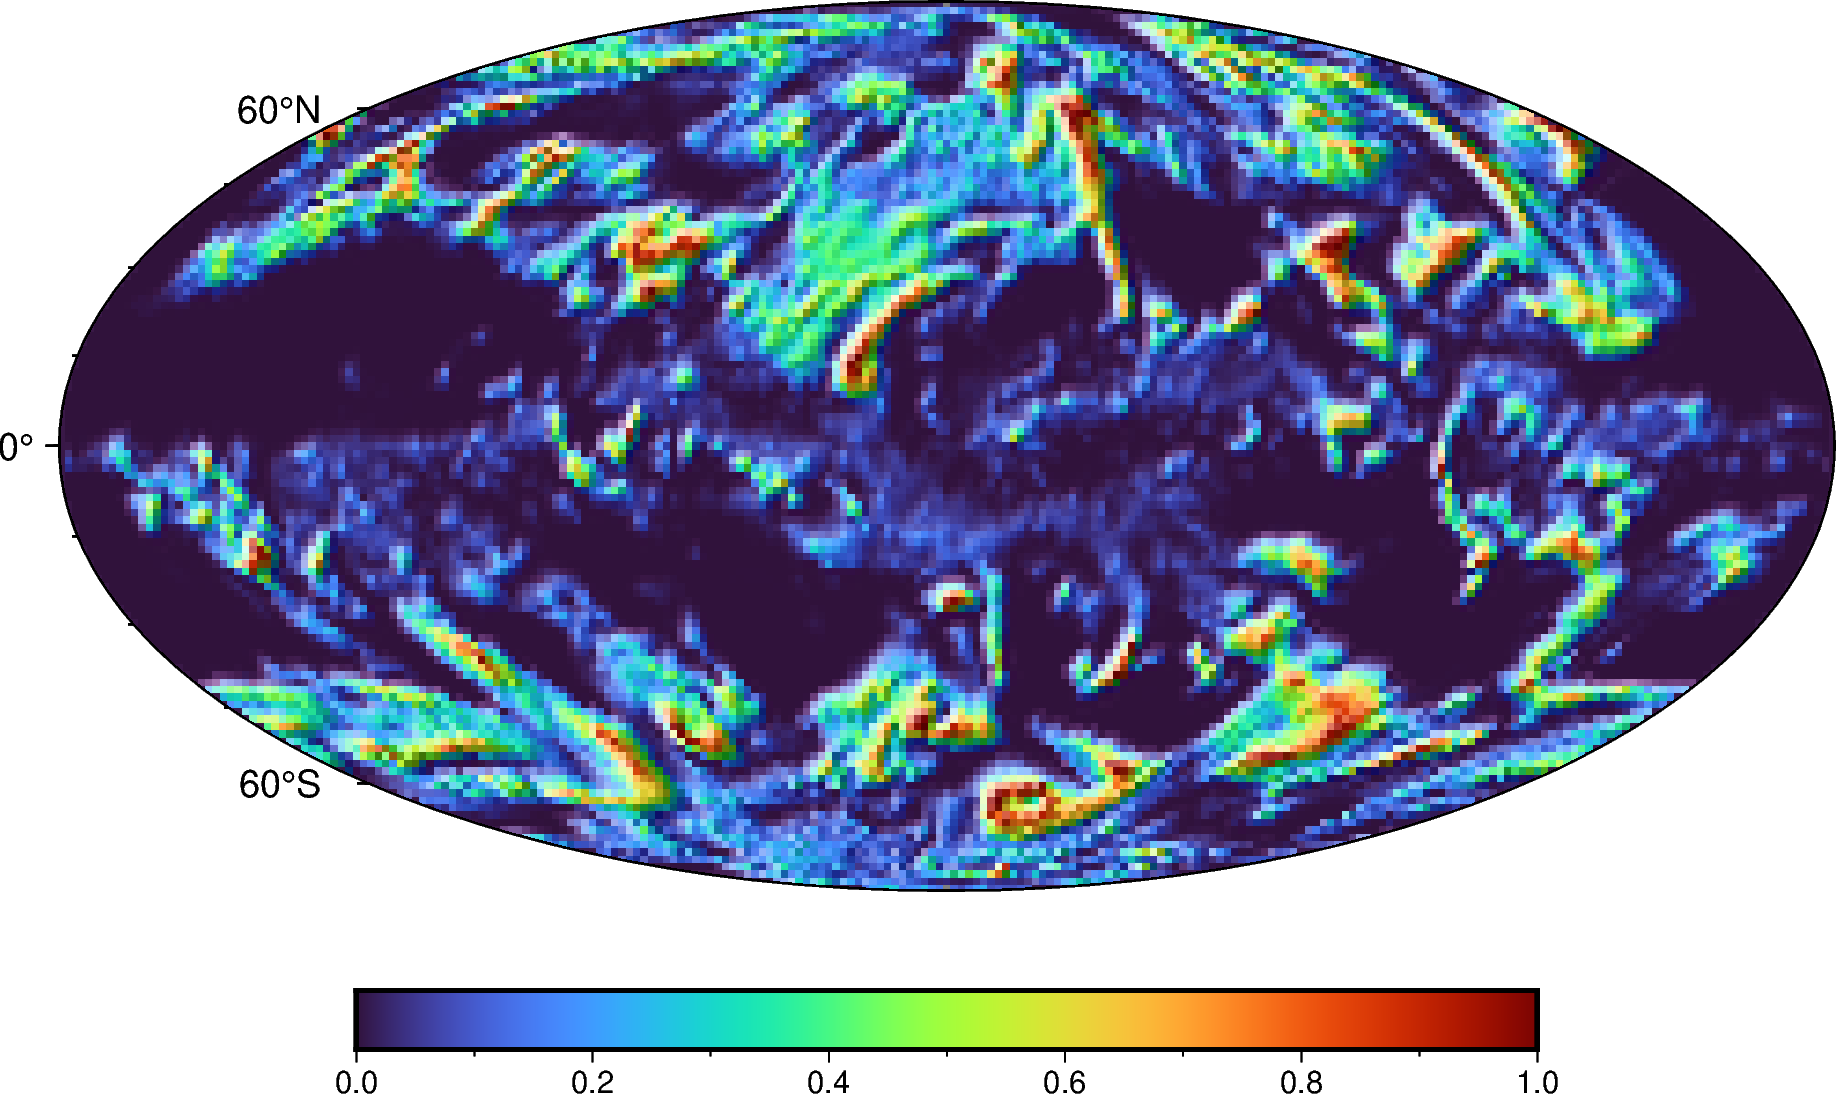

In [11]:
fig.show(width='70%')